# Supplementary Figure 3, panels c, d, e
Quantitative comparison of gene features with ResNet features and summary features

In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sq.datasets.visium_hne_adata()

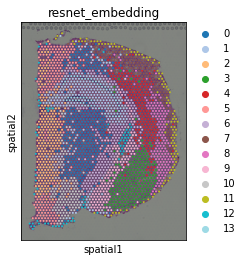

In [3]:
# add resnet embedding clusters
obs_resnet = pd.read_csv("./resnet_embedding.csv.gz", index_col=0)
adata.obs["resnet_embedding"] = obs_resnet["resnet_embedding_cluster"].astype("category").values
sc.pl.spatial(adata, color="resnet_embedding", palette="tab20")

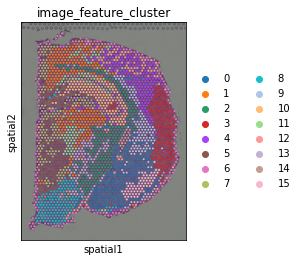

In [4]:
# add image feature clusters
adata.obs['image_feature_cluster'] = pd.read_csv('../image_figures/data/features_cluster.csv', index_col=0)
adata.obs['image_feature_cluster'] = adata.obs['image_feature_cluster'].astype('category')

sc.pl.spatial(adata, color="image_feature_cluster")

In [9]:
# plotting settings
sc.settings.dpi = 300
sc.set_figure_params(facecolor="white", fontsize=14)
# fontsize sets the size of the title

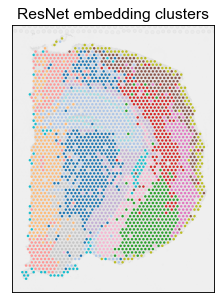

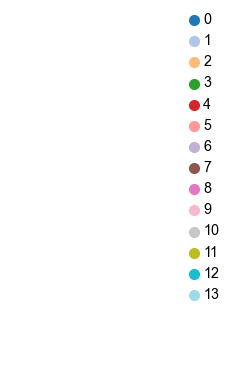

In [10]:
# plot resnet clusters
fig, ax = plt.subplots(figsize=(3, 5))
sc.pl.spatial(
    adata,
    color='resnet_embedding',
    img_key='hires',
    ax=ax,
    alpha_img=0.2,
    bw=True,
    title='ResNet embedding clusters',
    #legend_loc=False,
    show=False,
    palette='tab20'
)
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)
# get legend colors to plot later
colors, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# save figure
plt.tight_layout()
plt.savefig('figures/hne_resnet_embedding.png', dpi=300, bbox_inches='tight')

# plot and save legend
labels = [' '.join(l.split('_')) for l in labels]

fig, ax1 = plt.subplots(1,1, figsize=(3,5))
plt.figlegend(colors, labels, frameon=False, markerscale=1.5)
ax1.axis('off')
plt.tight_layout()
plt.savefig('figures/hne_resnet_embedding_legend.png', dpi=300, bbox_inches='tight')
plt.show()

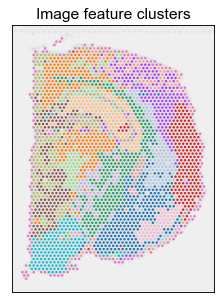

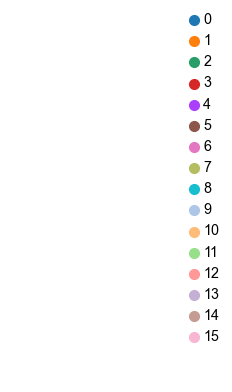

In [11]:
# plot image feature clusters
fig, ax = plt.subplots(figsize=(3, 5))
sc.pl.spatial(
    adata,
    color='image_feature_cluster',
    img_key='hires',
    ax=ax,
    alpha_img=0.2,
    bw=True,
    title='Image feature clusters',
    #legend_loc=False,
    show=False,
    #palette='tab20'
)
#ax.set_facecolor((0.75,0.75,0.75))
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)
# get legend colors to plot later
colors, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# save figure
plt.tight_layout()
plt.savefig('figures/hne_image_features_cluster.png', dpi=300, bbox_inches='tight')

# plot and save legend
labels = [' '.join(l.split('_')) for l in labels]

fig, ax1 = plt.subplots(1,1, figsize=(3,5))
plt.figlegend(colors, labels, frameon=False, markerscale=1.5)
ax1.axis('off')
plt.tight_layout()
plt.savefig('figures/hne_image_features_cluster_legend.png', dpi=300, bbox_inches='tight')
plt.show()

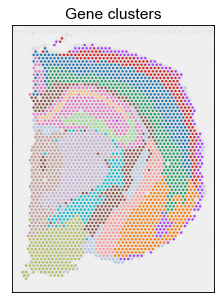

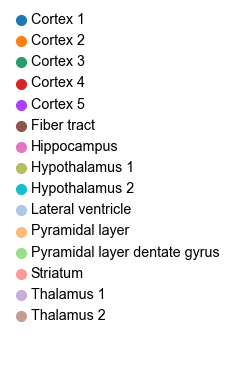

In [12]:
# plot gene clusters
fig, ax = plt.subplots(figsize=(3, 5))
sc.pl.spatial(
    adata,
    color='cluster',
    img_key='hires',
    ax=ax,
    alpha_img=0.2,
    bw=True,
    title='Gene clusters',
    #legend_loc=False,
    show=False,
)
#ax.set_facecolor((0.75,0.75,0.75))
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

# get legend colors to plot later
colors, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
# save figure
plt.tight_layout()
plt.savefig('figures/hne_gene_cluster.png', dpi=300, bbox_inches='tight')

# plot and save legend
labels = [' '.join(l.split('_')) for l in labels]

fig, ax1 = plt.subplots(1,1, figsize=(3,5))
plt.figlegend(colors, labels, frameon=False, markerscale=1.5)
ax1.axis('off')
plt.tight_layout()
plt.savefig('figures/hne_gene_cluster_legend.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
def freq_cluster(adata, clust, labels=None):
    
    df = adata.obs.copy()
    dic = {}
    for c in df[clust[0]].cat.categories:
        tot_values = df[df[clust[0]] == c].shape[0]
        prop = (
            df[df[clust[0]] == c]
            [clust[1]].value_counts()
            .apply(lambda x: x / tot_values)
        )
        dic[c] = prop
    df_final = pd.DataFrame(dic).round(2).replace(np.nan, 0)
    col_cluster = adata.uns[f"{clust[0]}_colors"]
    col_resnet = adata.uns[f"{clust[1]}_colors"]

    ax = sns.clustermap(
        df_final,
        annot=True,
        cmap="inferno",
        row_cluster=True,
        method="centroid",
        dendrogram_ratio=(.05, .05),
        figsize=(8, 10),
        col_colors=col_cluster,
        row_colors=col_resnet,
        #     row_colors=adata.uns["leiden_colors"],
    )
    sns.set(font_scale=1.2)
    ax.ax_cbar.set_position((1., .1, .03, .2))
    if labels is None:
        ax.ax_heatmap.set_xlabel(f"{clust[0]} original")
        ax.ax_heatmap.set_ylabel(f"{clust[1]} clusters")
    else:
        ax.ax_heatmap.set_xlabel(labels[0])
        ax.ax_heatmap.set_ylabel(labels[1])

    return

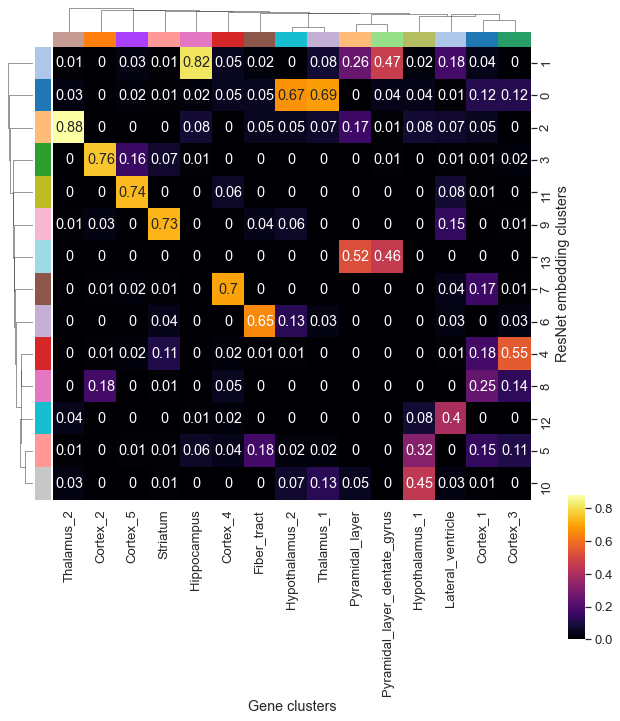

In [26]:
freq_cluster(adata, ["cluster","resnet_embedding"], labels=['Gene clusters', 'ResNet embedding clusters'])
plt.savefig('figures/resnet_embedding_heatmap.png', dpi=150)

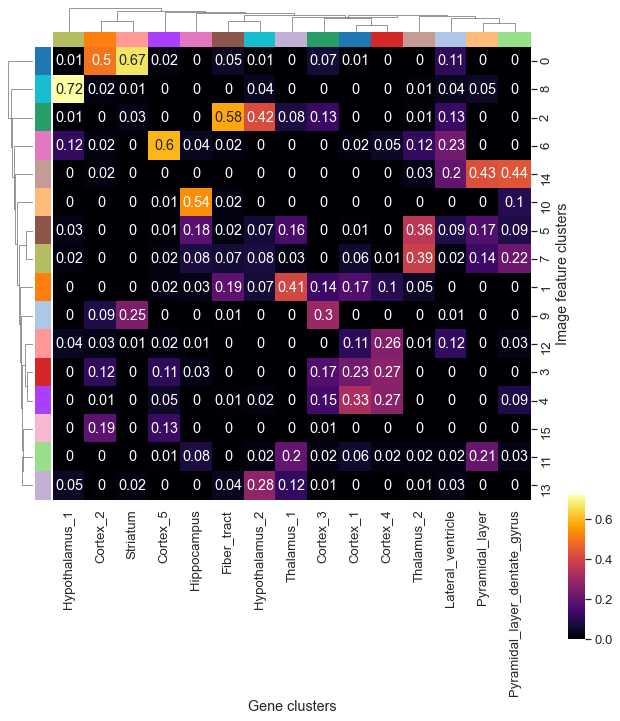

In [27]:
freq_cluster(adata, ["cluster","image_feature_cluster"], labels=['Gene clusters', 'Image feature clusters'])
plt.savefig('figures/image_feature_cluster_heatmap.png', dpi=150)